### 1.4 数据变形

#### 1.4.1 更改数组的形状
	修改指定数组的形状是 NumPy 中最常见的操作之一，表1-2 列出了NumPy中改变向量形状的一些常用函数。

|表1-2 NumPy中改变向量形状的一些常用函数 |   
|----------------------------------------|

|函数  	|描述  |
|:----------|:-----------------------------------------------------------------------|
arr.reshape	|重新将向量arr维度进行改变，不修改向量本身|
arr.resize	|重新将向量arr维度进行改变，修改向量本身|
arr.T	   |对向量 arr 进行转置|
arr.ravel	|对向量 arr 进行展平，即将多维数组变成1维数组，不会产生原数组的副本|
arr.flatten	|对向量 arr 进行展平，即将多维数组变成1维数组，返回原数组的副本|
arr.squeeze	|只能对维数为1的维度降维。对多维数组使用过不会报错，但是不会产生任何影响|
arr.transpose	|对高维矩阵进行轴对换|


下面我们来看一些示例。  
（1）reshape

In [1]:
import numpy as np

arr =np.arange(10)
print(arr)
# 将向量 arr 维度变换为2行5列
print(arr.reshape(2, 5))
# 指定维度时可以只指定行数或列数, 其他用 -1 代替
print(arr.reshape(5, -1))
print(arr.reshape(-1, 5))


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


值得注意的是，reshape 函数支持只指定行数或列数，此时剩余的值设置为-1即可。不过所指定的行数或列数一定要能被整除，例如，将上面代码修改为arr.reshape(3,-1)时将报错（10不能被3整除）。  
（2）resize


In [2]:
import numpy as np

arr =np.arange(10)
print(arr)
# 将向量 arr 维度变换为2行5列
arr.resize(2, 5)
print(arr)


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]


（3）.T

In [3]:
import numpy as np

arr =np.arange(12).reshape(3,4)
# 向量 arr 为3行4列
print(arr)
# 将向量 arr 进行转置为4行3列
print(arr.T)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


（4）ravel  
ravel 函数接收一个根据C语言格式（即按行优先排序），还是Fortran语言格式（即按列优先排序）来进行展平的参数，默认情况下是按行优先排序。


In [4]:
import numpy as np

arr =np.arange(6).reshape(2, -1)
print(arr)
# 按照列优先，展平
print("按照列优先，展平")
print(arr.ravel('F'))
# 按照行优先，展平
print("按照行优先，展平")
print(arr.ravel())


[[0 1 2]
 [3 4 5]]
按照列优先，展平
[0 3 1 4 2 5]
按照行优先，展平
[0 1 2 3 4 5]


（5）flatten(order='C')  
	把矩阵转换为向量，展平方式默认是按行优先排序（即参数order='C'），这种需求经常出现在卷积神经网络与全连接层之间。


In [5]:
import numpy as np
a =np.floor(10*np.random.random((3,4)))
print(a)
print(a.flatten(order='C'))


[[9. 1. 6. 2.]
 [6. 4. 9. 4.]
 [5. 8. 1. 4.]]
[9. 1. 6. 2. 6. 4. 9. 4. 5. 8. 1. 4.]


flatten展平运算经常用于神经网络中，一般我们在把2维、3维等数组转换为1维数组时会用到flatten展平这个操作，如图1-8所示。  
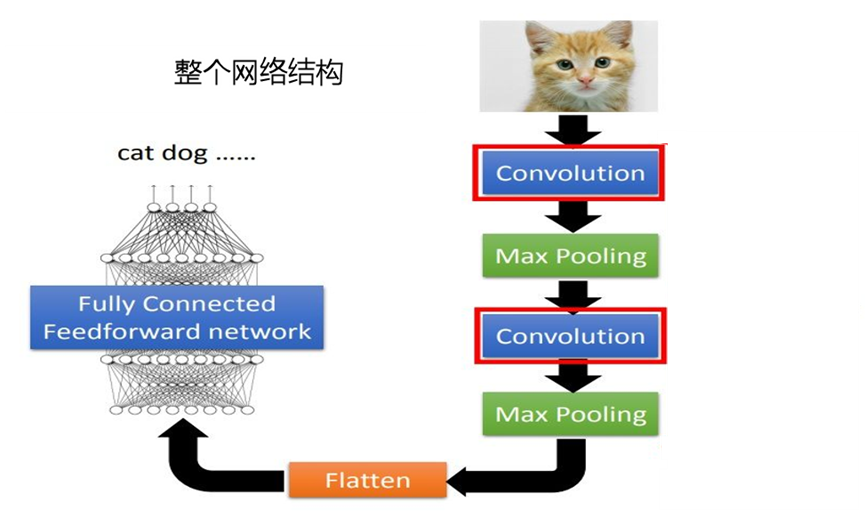
<center>图1-8 含Flatten运算的神经网络示意图</center>

（6）squeeze  
	这是一个主要用来降维的函数，可以把矩阵中含1的维度去掉。


In [6]:
import numpy as np

arr =np.arange(3).reshape(3, 1)
print(arr.shape)  #(3,1)
print(arr.squeeze().shape)  #(3,)
arr1 =np.arange(6).reshape(3,1,2,1)
print(arr1.shape) #(3, 1, 2, 1)
print(arr1.squeeze().shape) #(3, 2)


(3, 1)
(3,)
(3, 1, 2, 1)
(3, 2)


（7）transpose  
	对高维矩阵进行轴对换，多用于深度学习中，比如把图像表示颜色的RGB顺序改为GBR的顺序。


In [7]:
import numpy as np

arr2 = np.arange(24).reshape(2,3,4)
print(arr2.shape)  #(2, 3, 4)
print(arr2.transpose(1,2,0).shape)  #(3, 4, 2)


(2, 3, 4)
(3, 4, 2)


#### 1.4.2 合并数组
	合并数组也是最常见的操作之一，表1-3列举了几种常用的NumPy数组合并方法。
 
|表1-3 NumPy数组合并方法|
|-----------------------|

|函数	|描述|
|:----------|:---------------------------------------------------------|
np.append	|内存占用大|
np.concatenate	|没有内存问题|
np.stack	|沿着新的轴加入一系列数组|
np.hstack	|堆栈数组垂直顺序(行)|
np.vstack	|堆栈数组垂直顺序(列)|
np.dstack	|堆栈数组按顺序深入(沿第三维)|
np.vsplit	|将数组分解成垂直的多个子数组的列表|
zip([iterable, ...])	|将对象中对应的元素打包成一个个元组构成的zip对象|


[说明]  
1）append、concatnate以及stack都有一个 axis 参数，用于控制数组合并是按行还是按列优先排序。  
2）对于append和concatnate，待合并的数组必须有相同的行数或列数(满足一个即可)。  
3）stack、hstack、dstack待合并的数组必须具有相同的形状( shape)。  
	下面从表1-3中选择一些常用函数进行说明。  


（1）append  
合并一维数组：

In [8]:
import numpy as np

a =np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.append(a, b)
print(c) 


[1 2 3 4 5 6]


合并多维数组：

In [9]:
import numpy as np

a =np.arange(4).reshape(2, 2)
b = np.arange(4).reshape(2, 2)
# 按行合并
c = np.append(a, b, axis=0)
print('按行合并后的结果')
print(c)
print('合并后数据维度', c.shape)
# 按列合并
d = np.append(a, b, axis=1)
print('按列合并后的结果')
print(d)
print('合并后数据维度', d.shape)


按行合并后的结果
[[0 1]
 [2 3]
 [0 1]
 [2 3]]
合并后数据维度 (4, 2)
按列合并后的结果
[[0 1 0 1]
 [2 3 2 3]]
合并后数据维度 (2, 4)


（2）concatenate  
沿指定轴连接数组或矩阵：

In [10]:
import numpy as np
a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

c = np.concatenate((a, b), axis=0)
print(c)
d = np.concatenate((a, b.T), axis=1)
print(d)


[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]


（3）stack  
沿指定轴堆叠数组或矩阵：

In [11]:
import numpy as np

a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(np.stack((a, b), axis=0))


[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


（4）内置函数zip  
zip是Python的一个内置函数，多用于张量运算中。


In [12]:
import numpy as np

a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c=c=zip(a,b)
for i,j in c:
    print(i, end=",")
print(j)


[1 2],[3 4],[7 8]


In [13]:
import numpy as np

a1 = [1,2,3]
b1 = [4,5,6]
c1=zip(a1,b1)
for i,j in c1:
    print(i, end=",")
print(j)


1,2,3,6


### 1.5 通用函数	
前文提到，NumPy提供了两种基本的对象，即ndarray和ufunc对象。前面我们介绍了ndarray，本节将介绍ufunc，它是一种能对数组的每个元素进行操作的函数。许多ufunc函数都是用C语言级别实现的，因此计算速度非常快。此外，它们比math模块中的函数更灵活。math模块中函数的输入一般是标量，但NumPy中函数的输入可以是向量或矩阵，而利用向量或矩阵可以避免使用循环语句，这点在机器学习、深度学习中非常重要。表1-4为NumPy中几个常用的通用函数。

|表1-4   NumPy中几个常用的通用函数| 
|----------------------------------| 
          
|函数	|使用方法|
|:------|:--------------------------|
sqrt	|计算序列化数据的平方根|
sin,cos	|三角函数|
abs	|计算序列化数据的绝对值|
dot	|矩阵运算|
log,log10,log2	|对数函数|
exp	|指数函数|
cumsum,cumproduct	|累计求和，求积|
sum	|对一个序列化数据进行求和|
mean	|计算均值|
median	|计算中位数|
std	|计算标准差|
var	|计算方差|
corrcoef	|计算相关系数|


【说明】  
np.max,np.sum,np.min等函数中都涉及一个有关轴的参数（即axis），该参数的具体含义，可参考图1-9。  
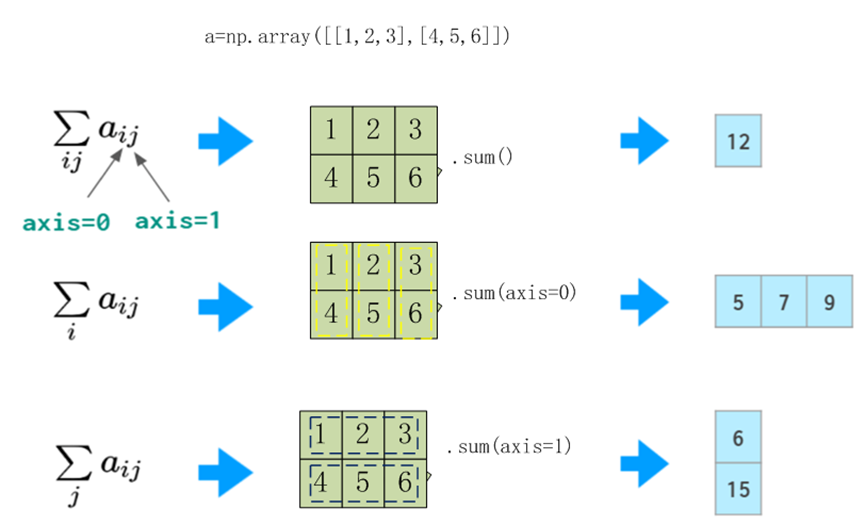
<center>图1-9 可视化参数axis的具体含义 </center>  
1）math与numpy函数的性能比较：


In [15]:
import time
import math
import numpy as np

x = [i * 0.001 for i in np.arange(1000000)]
#start = time.clock()
start = time.perf_counter()
for i, t in enumerate(x):
    x[i] = math.sin(t)
print ("math.sin:", time.perf_counter() - start )

x = [i * 0.001 for i in np.arange(1000000)]
x = np.array(x)
#start = time.clock()
start = time.perf_counter()
np.sin(x)
print ("numpy.sin:", time.perf_counter() - start )


math.sin: 0.2539111000005505
numpy.sin: 0.008215500001824694


【说明】上面的代码中，为避免不必要的警告信息，已用time.perf_counter()替换time.clock()（书中代码使用该函数）  
由此可见，numpy.sin比math.sin快近10倍。  
2）循环与向量运算的比较。充分使用Python的NumPy库中的内建函数（built-in function），实现计算的向量化，可大大提高运行速度。NumPy库中的内建函数使用了SIMD指令。如下使用的向量化要比使用循环的计算速度快得多。如果使用GPU，其性能将更强大,不过NumPy不支持GPU。


In [16]:
import time
import numpy as np

x1 = np.random.rand(1000000)
x2 = np.random.rand(1000000)
##使用循环计算向量点积
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n for loop----- Computation time = " + str(1000*(toc - tic)) + "ms")
##使用numpy函数求点积
tic = time.process_time()
dot = 0
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n verctor version---- Computation time = " + str(1000*(toc - tic)) + "ms")


dot = 250124.210944561
 for loop----- Computation time = 437.5ms
dot = 250124.21094456295
 verctor version---- Computation time = 0.0ms


从运行结果上来看，使用for循环的运行时间大约是使用向量运算的400倍。因此，在深度学习算法中，我们一般使用向量化矩阵运算。

#### 1.6 广播机制	
NumPy的通用函数（Universal Functions，简称ufunc）中要求输入的数组shape是一致的，当数组的shape不相等的时候，则会使用广播机制。不过，调整数组使得shape一样，需满足一定规则，否则将出错。这些规则可归结为以下四条。  
1）让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐；如：a：2x3x2；b：3x2；则b向a看齐，在b的前面加1：变为：1x3x2  
2）输出数组的shape是输入数组shape的各个轴上的最大值；  
3）如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错；  
4）当输入数组的某个轴的长度为1时，沿着此轴运算时都用（或复制）此轴上的第一组值。  


广播在整个NumPy中用于决定如何处理形状迥异的数组，涉及的算术运算包括(+，-，*，/…)。这些规则说的很严谨，但不直观，下面我们结合图形与代码进一步说明。
目的：A+B。其中A为4x1矩阵，B为一维向量 (3,)。要相加，需要做如下处理：  
1）根据规则1，B需要向看齐，把B变为（1,3）。  
2）根据规则2，输出的结果为各个轴上的最大值，即输出结果应该为（4,3）矩阵。  
那么A如何由（4,1）变为（4,3）矩阵？B如何由（1,3）变为（4,3）矩阵？  
3）根据规则4，用此轴上的第一组值（要主要区分是哪个轴），进行复制（但在实际处理中不是真正复制，而是采用其他对象如ogrid对象，进行网格处理，否则太耗内存）即可，  
如图1-10所示。


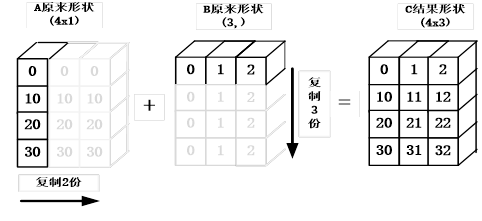
<center> 图1-10 NumPy广播规则示意图 </center>
具体实现如下：

In [17]:
import numpy as np
A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
print("A矩阵的形状:{},B矩阵的形状:{}".format(A.shape,B.shape))
C=A+B
print("C矩阵的形状:{}".format(C.shape))
print(C)


A矩阵的形状:(4, 1),B矩阵的形状:(3,)
C矩阵的形状:(4, 3)
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


### 1.7 用NumPy实现回归实例
前面我们介绍了NumPy的属性及各种操作，对如何使用NumPy数组有了一定认识。下面我们将分别用NumPy、TensorFlowl实现同一个机器学习任务，比较它们之间的异同及优缺点，从而加深你对TensorFlow的理解。  
	首先，我们用最原始的NumPy实现有关回归的一个机器学习任务，这种方法的代码可能多一点，但每一步都是透明的，有利于理解每一步的工作原理。主要步骤分析如下。  
	首先，给出一个数组x，然后基于表达式：y=3x^2+2，加上一些噪音数据到达另一组数据y。  
	然后，构建一个机器学习模型，学习表达式y=wx^2+b的两个参数w、b。数组x、y的数据为训练数据。  
	最后，采用梯度梯度下降法，通过多次迭代，学习到w、b的值。  
以下为具体实现步骤。  
1）导入需要的库。

In [18]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

2）生成输入数据x及目标数据y。  
	设置随机数种子，生成同一个份数据，以便用多种方法进行比较。

In [19]:
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)     

3）查看x，y数据分布情况。

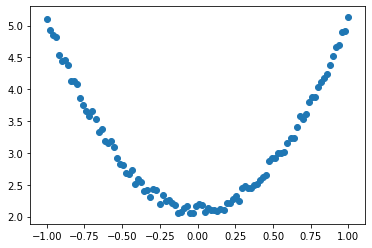

In [20]:
# 画图
plt.scatter(x, y)
plt.show()

4）初始化权重参数。

In [21]:
# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 

5)训练模型。   
定义损失函数，假设批量大小为100：
$$ Loss=\frac{1}{2}\sum_{i=1}^{100}(wx_i^2+b-y_i)^2$$
对损失函数求导：
$$\frac{\partial Loss}{\partial w}=\sum_{i=1}^{100}(wx_i^2+b-y_i)x_i^2 $$
$$\frac{\partial Loss}{\partial b}=\sum_{i=1}^{100}(wx_i^2+b-y_i) $$
利用梯度下降法学习参数，学习率为lr。
$$ w1-=lr* \frac {\partial Loss}{\partial w}$$
$$ b1-=lr* \frac {\partial Loss}{\partial b}$$
用代码实现这些表达式

In [22]:
lr =0.001 # 学习率

for i in range(800):
    # 正向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b

6）可视化结果。

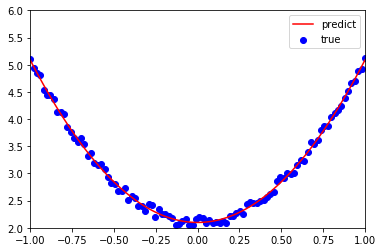

[[2.98927619]] [[2.09818307]]


In [24]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()

print(w1,b1)

从结果看来，学习效果还是比较理想的。